### How to avoid 'inf' of rolling().corr() in pandas

In [1]:
import numpy as np
import pandas as pd

### make data with same value

In [2]:
a = [5,5,5,5,5,5,5,5,5,5]
a

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [3]:
b=a

### make dataframe with a and b

In [4]:
ab = pd.DataFrame({'a':a, 'b':b})  # make dictionary and converty to dataframe

In [5]:
ab

,a,b
0,5,5
1,5,5
2,5,5
3,5,5
4,5,5
5,5,5
6,5,5
7,5,5
8,5,5
9,5,5


In [6]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
a    10 non-null int64
b    10 non-null int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [7]:
ab['a'].rolling(5).corr(ab['b'])

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
dtype: float64

In [8]:
ab['a'].rolling(5).corr(ab['a'])

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: a, dtype: float64

In [9]:
len(ab)

10

In [10]:
np.random.rand(len(ab))/100

array([0.00335172, 0.00135461, 0.0081144 , 0.00390782, 0.00506254,
       0.00151444, 0.00045478, 0.00865019, 0.00759077, 0.00016536])

In [11]:
# Add small noise in ab['b']
ab['b'] = ab['b'] + np.random.rand(len(ab))/100

In [12]:
ab['b']

0    5.002235
1    5.002606
2    5.008091
3    5.001759
4    5.005031
5    5.007186
6    5.009683
7    5.003667
8    5.001243
9    5.005537
Name: b, dtype: float64

In [13]:
ab['a'].rolling(5).corr(ab['b'])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5   -inf
6    NaN
7    NaN
8   -inf
9   -inf
dtype: float64

In [14]:
# Add small noise in ab['a']
ab['a'] = ab['a'] + np.random.rand(len(ab))/100
ab['a']

0    5.008793
1    5.008497
2    5.004080
3    5.000306
4    5.005495
5    5.005424
6    5.009814
7    5.001942
8    5.004353
9    5.006386
Name: a, dtype: float64

In [15]:
ab['a'].rolling(5).corr(ab['b'])

0         NaN
1         NaN
2         NaN
3         NaN
4   -0.113307
5    0.148246
6    0.853266
7    0.964672
8    0.791894
9    0.786596
dtype: float64

***

### Two column data

In [16]:
# Make data
np.random.seed(10)
a = np.random.random(30).reshape(30,1)
b = np.random.random(30).reshape(30,1)

In [17]:
a.shape,b.shape

((30, 1), (30, 1))

In [18]:
a_1 = pd.DataFrame(a)
b_1 = pd.DataFrame(b)
a_1.shape,b_1.shape

((30, 1), (30, 1))

In [19]:
# s1.rolling(4).corr(s2)
corr = a_1.rolling(10).corr(b_1)
corr

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,0.450030


In [20]:
# Corrrelation of every block with 10 successive values
corr[9::10]

,0
9,0.450030
19,-0.006453
29,0.202857


In [21]:
# Rolling sum and mean

In [22]:
r_sum = a_1.rolling(10).sum()
r_sum

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,4.113873


In [23]:
# Rolling mean
mean = a_1.rolling(10).mean()
mean

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,0.411387


### Two array data

In [24]:
# Make data
np.random.seed(10)
a = np.random.random(30).reshape(10,3)
b = np.random.random(30).reshape(10,3)

In [25]:
a.shape,b.shape

((10, 3), (10, 3))

In [26]:
a_1 = pd.DataFrame(a)
b_1 = pd.DataFrame(b)
a_1.shape,b_1.shape
# print pd.rolling_corr(arg1=a_1, arg2=b_1, window=5)

((10, 3), (10, 3))

In [27]:
# s1.rolling(4).corr(s2)
a_1.rolling(5).corr(b_1)

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.441993,0.254435,0.707801
5,0.314446,0.233392,0.425191
6,0.243755,-0.441434,0.352801
7,0.281139,-0.864357,-0.192409
8,0.543645,-0.925822,-0.563786
9,0.445918,-0.784808,-0.532234


In [28]:
a_1.rolling(5).corr(a_1)

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,1.0,1.0,1.0
5,1.0,1.0,1.0
6,1.0,1.0,1.0
7,1.0,1.0,1.0
8,1.0,1.0,1.0
9,1.0,1.0,1.0


In [29]:
a_1.rolling(5).mean()

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.362095,0.495468,0.558714
5,0.330336,0.635669,0.490360
6,0.364130,0.678883,0.553909
7,0.352952,0.601445,0.654914
8,0.423650,0.551176,0.587788
9,0.525488,0.578817,0.545472


In [30]:
# Rolling correlation between two column vectors
df = pd.DataFrame(np.array([a[:,0], b[:,0]]).T, columns=['T','H'])

In [31]:
df

,T,H
0,0.771321,0.805223
1,0.748804,0.319236
2,0.198063,0.113984
3,0.088340,0.626287
4,0.003948,0.198948
5,0.612526,0.754648
6,0.917774,0.325512
7,0.142170,0.093460
8,0.441833,0.384114
9,0.513138,0.456305


In [32]:
# rolling correlation between T and H
df['T'].rolling(5).corr(df['H'])

0         NaN
1         NaN
2         NaN
3         NaN
4    0.441993
5    0.314446
6    0.243755
7    0.281139
8    0.543645
9    0.445918
dtype: float64

In [33]:
df['T'].rolling(5).corr(df['T'])

0    NaN
1    NaN
2    NaN
3    NaN
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: T, dtype: float64

In [34]:
df['H'].rolling(5).corr(df['H'])

0    NaN
1    NaN
2    NaN
3    NaN
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: H, dtype: float64

In [35]:
a[:,0].shape

(10,)

### Load real data:  T & H

In [36]:
df0=pd.read_csv('./data/s25250.csv', index_col='date')
df0.head(),df0.tail()  # check the descending time

(                         temperature  humidity
 date                                          
 2019-03-26 23:36:19.055         28.3      23.4
 2019-03-26 23:36:16.052         28.3      23.3
 2019-03-26 23:36:13.049         28.3      23.3
 2019-03-26 23:36:10.047         28.3      23.1
 2019-03-26 23:36:07.046         28.3      23.1,
                          temperature  humidity
 date                                          
 2019-03-26 02:33:21.465         23.2      39.6
 2019-03-26 02:33:18.463         23.2      39.6
 2019-03-26 02:33:15.462         23.2      39.8
 2019-03-26 02:33:12.461         23.2      39.5
 2019-03-26 02:33:09.460         23.3      39.1)

In [37]:
df = df0.sort_index()
df.head(),df.tail()

(                         temperature  humidity
 date                                          
 2019-03-26 02:33:09.460         23.3      39.1
 2019-03-26 02:33:12.461         23.2      39.5
 2019-03-26 02:33:15.462         23.2      39.8
 2019-03-26 02:33:18.463         23.2      39.6
 2019-03-26 02:33:21.465         23.2      39.6,
                          temperature  humidity
 date                                          
 2019-03-26 23:36:07.046         28.3      23.1
 2019-03-26 23:36:10.047         28.3      23.1
 2019-03-26 23:36:13.049         28.3      23.3
 2019-03-26 23:36:16.052         28.3      23.3
 2019-03-26 23:36:19.055         28.3      23.4)

In [38]:
corr = df['temperature'].rolling(20).corr(df['humidity'])

In [39]:
np.isinf(corr).sum()  # corr --> inf

4254

### Correction of infinity corrrelation

In [40]:
df['temp']=df['temperature']+np.random.rand(len(df))/100

In [41]:
corr_TH = df['temp'].rolling(20).corr(df['humidity'])

In [42]:
np.isinf(corr_TH).sum()

0

In [43]:
new_df = pd.DataFrame()

In [44]:
type(new_df)

pandas.core.frame.DataFrame

In [45]:
idx=list(range(19,len(df),20))

In [46]:
date_idx=list(range(0,len(df),20)) # first time of the block

In [47]:
idx[:5],date_idx[:10]

([19, 39, 59, 79, 99], [0, 20, 40, 60, 80, 100, 120, 140, 160, 180])

In [48]:
# rolling mean temperature
new_df['mT'] = df['temperature'].rolling(20).mean()[idx]

In [49]:
# rolling mean humidity
new_df['mH'] = df['humidity'].rolling(20).mean()[idx]

In [50]:
new_df['corr'] = corr_TH[idx]

In [51]:
new_df.info()  # index인 시간은 온도와 습도에 연동되어 자동으로 처리된다.

<class 'pandas.core.frame.DataFrame'>
Index: 1262 entries, 2019-03-26 02:34:06.504 to 2019-03-26 23:35:49.033
Data columns (total 3 columns):
mT      1262 non-null float64
mH      1262 non-null float64
corr    1262 non-null float64
dtypes: float64(3)
memory usage: 39.4+ KB


In [52]:
new_df.head()

,mT,mH,corr
date,,,
2019-03-26 02:34:06.504,23.205,39.750,-0.587391
2019-03-26 02:35:06.542,24.290,92.100,0.469968
2019-03-26 02:36:06.582,23.285,51.075,-0.526759
2019-03-26 02:37:06.627,23.300,39.860,-0.356571
2019-03-26 02:38:06.663,23.300,39.130,-0.251941


In [53]:
df[:22]

,temperature,humidity,temp
date,,,
2019-03-26 02:33:09.460,23.3,39.1,23.305974
2019-03-26 02:33:12.461,23.2,39.5,23.209028
2019-03-26 02:33:15.462,23.2,39.8,23.205346
2019-03-26 02:33:18.463,23.2,39.6,23.205902
2019-03-26 02:33:21.465,23.2,39.6,23.200393
2019-03-26 02:33:24.468,23.2,39.8,23.203572
2019-03-26 02:33:27.481,23.2,39.7,23.200796
2019-03-26 02:33:30.483,23.2,39.8,23.203055
2019-03-26 02:33:33.483,23.2,39.2,23.203307


In [54]:
%matplotlib inline

In [55]:
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

In [56]:
new_df.mean()

mT      22.225987
mH      33.511684
corr     0.007833
dtype: float64

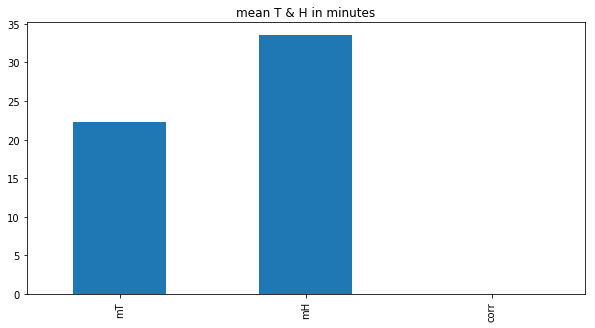

In [57]:
new_df.mean().plot.bar(figsize=(10,5), title="mean T & H in minutes")

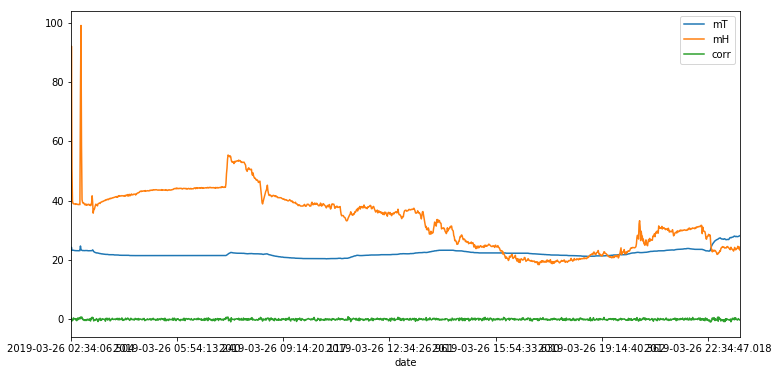

In [58]:
new_df.plot(figsize=(12,6))

> 문자열인 시간이 겹쳐서 그려지는 문제를 해결하는 방법은?
- Convert index (type:string) to timestamp

In [59]:
# Convert index (type:string) to timestamp
new_df.index = pd.to_datetime(new_df.index)

In [60]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1262 entries, 2019-03-26 02:34:06.504000 to 2019-03-26 23:35:49.033000
Data columns (total 3 columns):
mT      1262 non-null float64
mH      1262 non-null float64
corr    1262 non-null float64
dtypes: float64(3)
memory usage: 39.4 KB


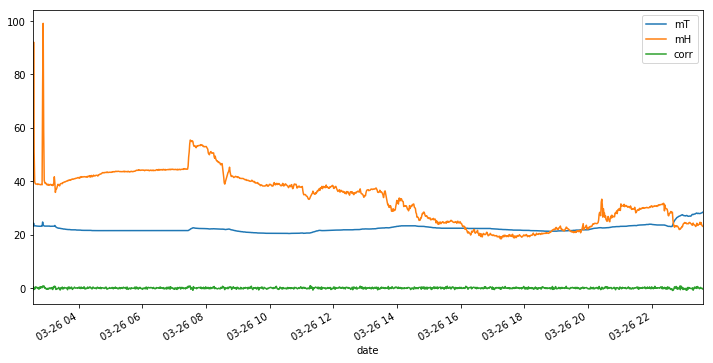

In [61]:
new_df.plot(figsize=(12,6))

In [62]:
# Estimate the mean of iot_s for every 5 minutes
new_df.resample('300S').mean()  # mean per every 5 minutes

,mT,mH,corr
date,,,
2019-03-26 02:30:00,23.205,39.750,-0.587391
2019-03-26 02:35:00,23.493,52.222,-0.038767
2019-03-26 02:40:00,23.192,38.898,0.120781
2019-03-26 02:45:00,23.138,38.779,0.062276
2019-03-26 02:50:00,23.613,62.182,0.509882
2019-03-26 02:55:00,23.204,39.445,0.025981
2019-03-26 03:00:00,23.199,38.691,-0.221972
2019-03-26 03:05:00,23.140,38.642,-0.051954
2019-03-26 03:10:00,23.148,39.313,0.069319


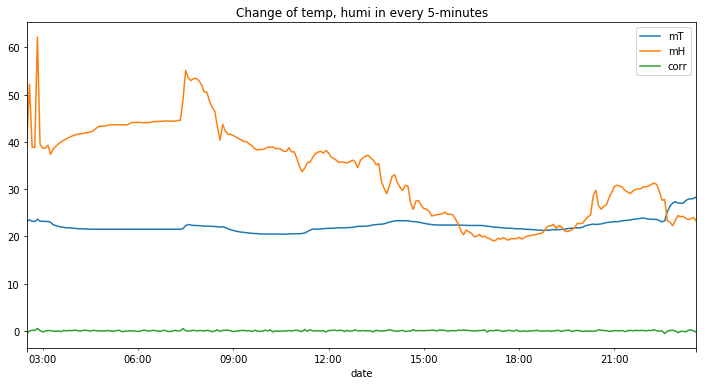

In [63]:
#  Plot mean of the iot data per every 5 minutes
new_df.resample('300S').mean().plot(figsize=(12,6), title='Change of temp, humi in every 5-minutes')

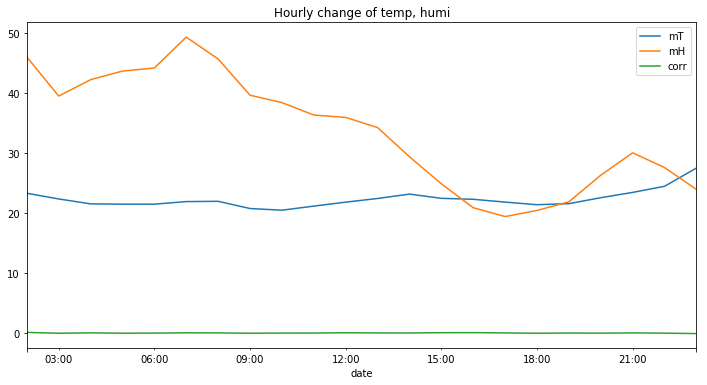

In [64]:
#  Plot mean of the iot data per every hour 
new_df.resample('H').mean().plot(figsize=(12,6), title='Hourly change of temp, humi')

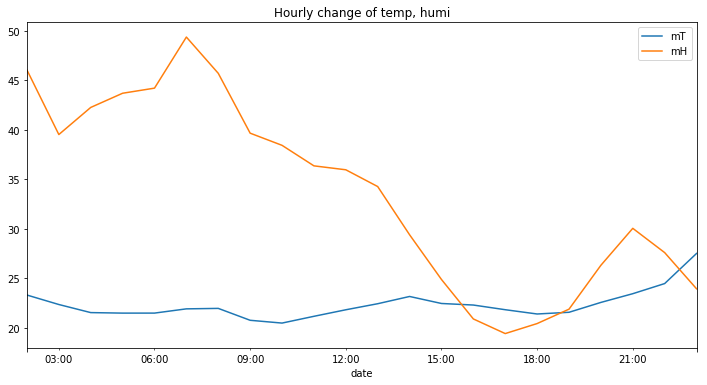

In [65]:
#  Plot mean of the iot data per every hour 
new_df[['mT','mH']].resample('H').mean().plot(figsize=(12,6), title='Hourly change of temp, humi')

***

## Correlation btw. T & H

> ## $r = \frac{\sum{(x - \bar x) (y - \bar y)}}{\sqrt{\sum (x - \bar x)^2 \sum (y - \bar y)^2}}$

In [66]:
import matplotlib.pyplot as plt

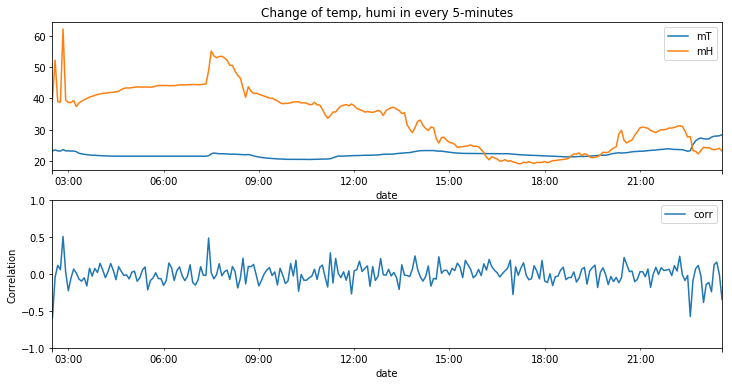

In [67]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)
ax2.set_ylabel('Correlation')
#  Plot mean of the iot data per every 5 minutes
new_df[['mT','mH']].resample('300S').mean().plot(figsize=(12,6), title='Change of temp, humi in every 5-minutes', ax=ax1)
new_df[['corr']].resample('300S').mean().plot(figsize=(12,6), ax=ax2, ylim=[-1,1])

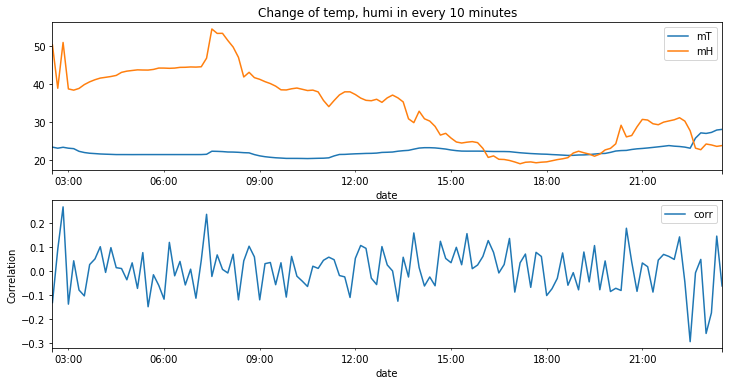

In [73]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)
ax2.set_ylabel('Correlation')
#  Plot mean of the iot data per every 5 minutes
new_df[['mT','mH']].resample('600S').mean().plot(figsize=(12,6), title='Change of temp, humi in every 10 minutes', ax=ax1)
new_df[['corr']].resample('600S').mean().plot(figsize=(12,6), ax=ax2) #, ylim=[-,1])

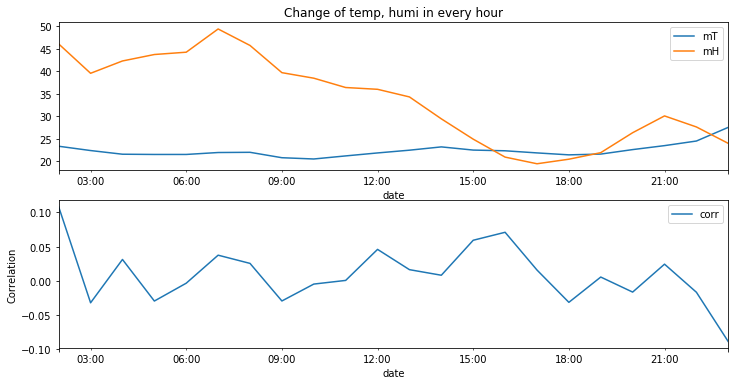

In [74]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)
ax2.set_ylabel('Correlation')
#  Plot mean of the iot data per every 5 minutes
new_df[['mT','mH']].resample('H').mean().plot(figsize=(12,6), title='Change of temp, humi in every hour', ax=ax1)
new_df[['corr']].resample('H').mean().plot(figsize=(12,6), ax=ax2) #, ylim=[-,1])